In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("flights_small.csv",sep=";")
df.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,5,20,3,WN,2433,N638SW,BNA,LGA,1150,...,1919.0,259.0,0,0,NaN,1.0,0.0,38.0,220.0,0.0
1,2015,11,23,1,AA,2256,N481AA,DFW,IAH,1550,...,1643.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,3,24,2,B6,585,N355JB,ROC,JFK,1840,...,1947.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Preparar los datos para Machine Learning

In [2]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

df_ml = df[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
            'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'DISTANCE', 'CANCELLED']].copy()

df_ml = df_ml.dropna()
df_ml = df_ml[df_ml['CANCELLED'] == 0]
df_ml['RETRASO_BINARIO'] = df_ml['ARRIVAL_DELAY'] > 15
df_ml = df_ml.drop(columns=['CANCELLED', 'ARRIVAL_DELAY'])
df_ml = df_ml[df_ml['DEPARTURE_DELAY'].between(-60, 300)]
df_ml = df_ml[df_ml['DISTANCE'] < 4000]

X = df_ml.drop('RETRASO_BINARIO', axis=1)
y = df_ml['RETRASO_BINARIO']

In [3]:
columnas_categoricas = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
columnas_numericas = ['DEPARTURE_DELAY', 'DISTANCE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
ohe = OneHotEncoder(drop='first', handle_unknown='ignore',sparse_output = False) # get_dummies
X_train_cat = ohe.fit_transform(X_train[columnas_categoricas])
X_test_cat = ohe.transform(X_test[columnas_categoricas])

In [5]:
scaler = StandardScaler() # (X - mean) / sd
X_train_num = scaler.fit_transform(X_train[columnas_numericas])
X_test_num = scaler.transform(X_test[columnas_numericas])

In [6]:
X_train_final = np.concatenate([X_train_cat, X_train_num], axis=1)
X_test_final = np.concatenate([X_test_cat, X_test_num], axis=1)

# Introducción al Aprendizaje Supervisado: KNN

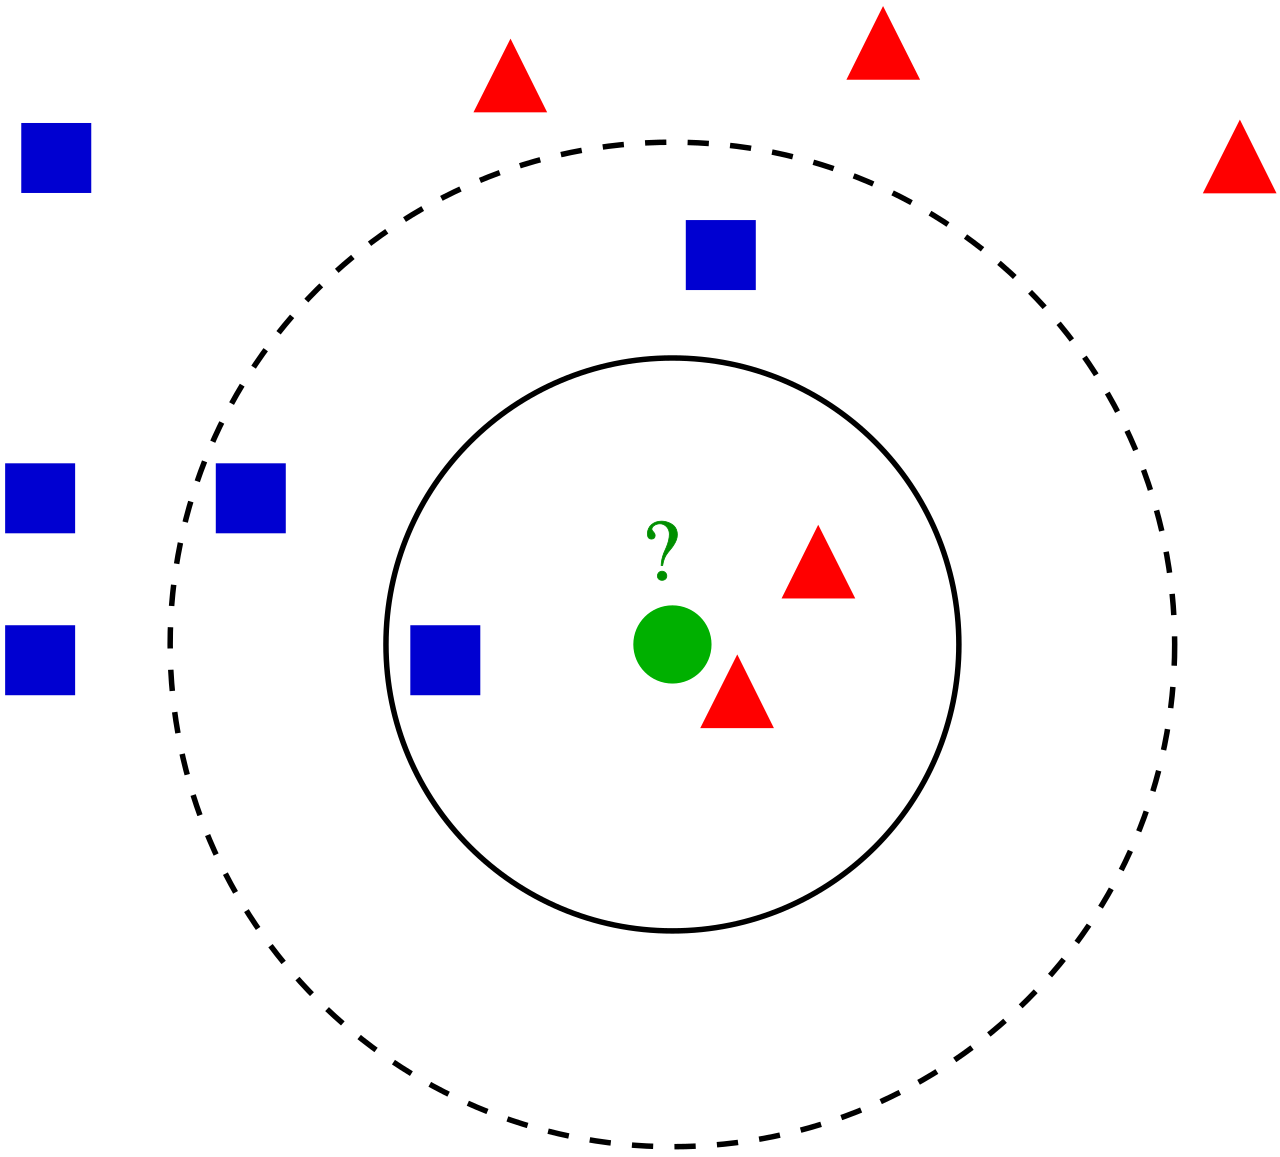

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

df_knn = df[['DEPARTURE_DELAY', 'DISTANCE', 'AIR_TIME', 'ARRIVAL_DELAY']].dropna()
df_knn['RETRASO_BINARIO'] = df_knn['ARRIVAL_DELAY'] > 15
df_knn = df_knn.drop(columns=['ARRIVAL_DELAY'])

X = df_knn[['DEPARTURE_DELAY', 'DISTANCE', 'AIR_TIME']]
y = df_knn['RETRASO_BINARIO'] #clasificación

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train_scaled, y_train)
y_pred = modelo_knn.predict(X_test_scaled)

print("Accuracy: " + str(accuracy_score(y_test, y_pred)))


Accuracy: 0.9286805909322465


In [14]:
y.value_counts() / len(y)

RETRASO_BINARIO
False    0.815894
True     0.184106
Name: count, dtype: float64

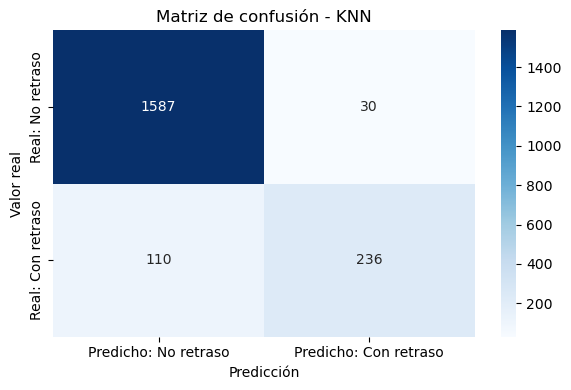

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

matriz = confusion_matrix(y_test, y_pred)

confusion_df = pd.DataFrame(
    matriz,
    index=["Real: No retraso", "Real: Con retraso"],
    columns=["Predicho: No retraso", "Predicho: Con retraso"]
)

plt.figure(figsize=(6,4))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión - KNN")
plt.ylabel("Valor real")
plt.xlabel("Predicción")
plt.tight_layout()
plt.show()

# Regresión Lineal (y variantes)

### Regresión Lineal Simple

La regresión lineal simple se utiliza para modelar la relación entre una variable independiente $x$ y una variable dependiente $y$.

El modelo es:

$$
y = \beta_0 + \beta_1 x + \varepsilon
$$

- $y$ es la variable que queremos predecir  
- $x$ es la variable explicativa  
- $\beta_0$ es la ordenada en el origen (intercept)  
- $\beta_1$ es la pendiente de la recta (cuánto cambia $y$ por cada unidad de $x$)  
- $\varepsilon$ es el término de error

El objetivo del modelo es **ajustar una recta** que minimicme el error cuadrático medio entre los valores reales y los predichos.

La fórmula del valor estimado de $y$ es:

$$
\hat{y} = \beta_0 + \beta_1 x
$$

El modelo se entrena buscando los coeficientes $\beta_0$ y $\beta_1$ que mejor se ajustan a los datos observados.


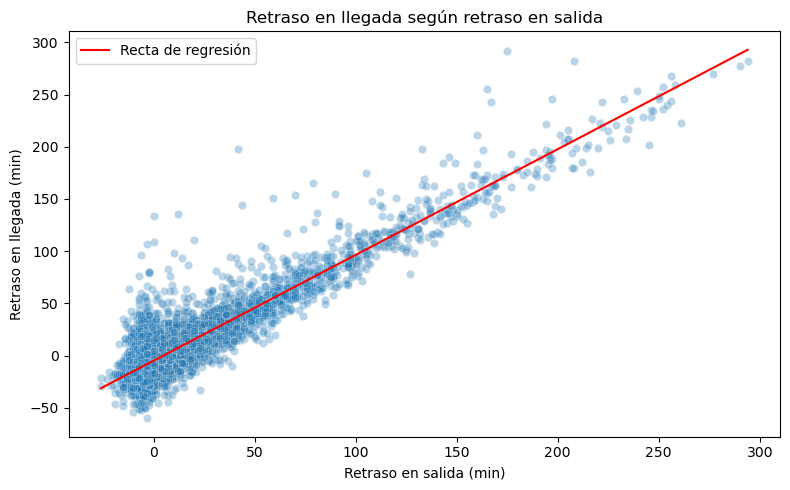

In [81]:
from sklearn.linear_model import LinearRegression

df_simple = df[['DEPARTURE_DELAY', 'ARRIVAL_DELAY']].dropna()
df_simple = df_simple[df_simple['DEPARTURE_DELAY'].between(-60, 300)]
df_simple = df_simple[df_simple['ARRIVAL_DELAY'].between(-60, 300)]

X = df_simple[['DEPARTURE_DELAY']]
y = df_simple['ARRIVAL_DELAY']

modelo = LinearRegression()
modelo.fit(X, y)

x_vals = X.sort_values(by='DEPARTURE_DELAY')
y_preds = modelo.predict(x_vals)

plt.figure(figsize=(8,5))
sns.scatterplot(x='DEPARTURE_DELAY', y='ARRIVAL_DELAY', data=df_simple, alpha=0.3)
plt.plot(x_vals, y_preds, color='red', label='Recta de regresión')
plt.title("Retraso en llegada según retraso en salida")
plt.xlabel("Retraso en salida (min)")
plt.ylabel("Retraso en llegada (min)")
plt.legend()
plt.tight_layout()
plt.show()



In [55]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

df_reg = df[['DEPARTURE_DELAY', 'DISTANCE', 'AIR_TIME', 'TAXI_OUT', 'TAXI_IN', 'ARRIVAL_DELAY']].dropna()

X = df_reg[['DEPARTURE_DELAY', 'DISTANCE', 'AIR_TIME', 'TAXI_OUT', 'TAXI_IN']]
y = df_reg['ARRIVAL_DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo_lr = LinearRegression()
modelo_lr.fit(X_train_scaled, y_train)
preds_lr = modelo_lr.predict(X_test_scaled)

print("R2: " + str(r2_score(y_test, preds_lr)))

R2: 0.9323431468066457


In [56]:
X_train_sm = sm.add_constant(X_train)  # añade la constante (intercepto)
modelo_sm = sm.OLS(y_train, X_train_sm).fit()
print(modelo_sm.summary())

                            OLS Regression Results                            
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 2.673e+04
Date:                Tue, 05 Aug 2025   Prob (F-statistic):               0.00
Time:                        10:23:02   Log-Likelihood:                -28662.
No. Observations:                7852   AIC:                         5.734e+04
Df Residuals:                    7846   BIC:                         5.738e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -24.0200      0.312    -

### Regularización en regresión: Ridge y Lasso

Cuando un modelo de regresión lineal tiene **muchas variables** o **colinealidad**, puede sobreajustarse.  
Para evitarlo, se usan técnicas de **regularización**, que penalizan los coeficientes grandes.

---

#### Ridge (Regresión de cresta)

Añade una penalización al modelo basada en la suma de los cuadrados de los coeficientes:

$$
\text{MSE} + \alpha \sum_{j=1}^{n} \beta_j^2
$$

- **No elimina variables**, pero reduce sus pesos.
- Ideal cuando hay muchas variables pequeñas relacionadas.
- Controlado por el parámetro $\alpha$ (cuanto mayor, más se reduce).

---

#### Lasso (Least Absolute Shrinkage and Selection Operator)

Penaliza usando la **suma de los valores absolutos** de los coeficientes:

$$
\text{MSE} + \alpha \sum_{j=1}^{n} |\beta_j|
$$

- **Puede eliminar variables**, dejando algunos coeficientes en 0.
- Útil para seleccionar variables automáticamente.
- También regulado por $\alpha$.


In [86]:
modelo_ridge = Ridge(alpha=100)
modelo_ridge.fit(X_train_scaled, y_train)
preds_ridge = modelo_ridge.predict(X_test_scaled)

print("R2: " + str(r2_score(y_test, preds_ridge)))

R2: 0.9291349656091915


In [87]:
modelo_ridge.coef_

array([ 36.3617009 , -12.76857069,  10.4714146 ,   7.14144538,
         4.06176481])

In [88]:
modelo_lasso = Lasso(alpha=5)
modelo_lasso.fit(X_train_scaled, y_train)
preds_lasso = modelo_lasso.predict(X_test_scaled)

print("R2: " + str(r2_score(y_test, preds_lasso)))

R2: 0.8480950098788237


In [89]:
modelo_lasso.coef_

array([32.15195793, -0.        , -0.        ,  2.50049823,  0.        ])

# Naives Bayes Classifier y Regresión Logística

#### Naive Bayes

Es un clasificador basado en el **Teorema de Bayes**, con la suposición de que las variables predictoras son independientes entre sí.

El teorema de Bayes se expresa así:

$$
P(A \mid B) = \frac{P(B \mid A) \cdot P(A)}{P(B)}
$$

En clasificación, se estima la probabilidad de una clase dada una serie de variables $x_1, x_2, ..., x_n$:

$$
P(\text{Clase} \mid x_1, x_2, ..., x_n) \propto P(\text{Clase}) \cdot \prod_{i=1}^{n} P(x_i \mid \text{Clase})
$$

Se asigna la clase con mayor probabilidad posterior.

---

#### Regresión Logística

Es un modelo de **clasificación binaria** que estima la probabilidad de que una observación pertenezca a la clase 1.

La fórmula del modelo es:

$$
P(Y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)}}
$$

Esta función se llama **sigmoide** o **función logística** y devuelve un valor entre 0 y 1.

**Regla de decisión:**

- Si $P > 0.5$ → clase 1  
- Si $P \leq 0.5$ → clase 0



In [92]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


df_nb = df[['DEPARTURE_DELAY', 'DISTANCE', 'AIR_TIME', 'ARRIVAL_DELAY']].dropna()
df_nb['RETRASO_BINARIO'] = df_nb['ARRIVAL_DELAY'] > 15
df_nb = df_nb.drop(columns=['ARRIVAL_DELAY'])

X = df_nb[['DEPARTURE_DELAY', 'DISTANCE', 'AIR_TIME']]
y = df_nb['RETRASO_BINARIO'] #clasificación

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_nb = GaussianNB()
modelo_nb.fit(X_train, y_train)
pred_nb = modelo_nb.predict(X_test)

print("Naive Bayes")
print(confusion_matrix(y_test, pred_nb))
print(classification_report(y_test, pred_nb))

Naive Bayes
[[1583   34]
 [ 106  240]]
              precision    recall  f1-score   support

       False       0.94      0.98      0.96      1617
        True       0.88      0.69      0.77       346

    accuracy                           0.93      1963
   macro avg       0.91      0.84      0.87      1963
weighted avg       0.93      0.93      0.93      1963



In [96]:
float(round((y_test == pred_nb).mean(),4))

0.9287

In [97]:
modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(X_train, y_train)
pred_log = modelo_log.predict(X_test)

print("Regresión logística")
print(confusion_matrix(y_test, pred_log))
print(classification_report(y_test, pred_log))

Regresión logística
[[1595   22]
 [ 112  234]]
              precision    recall  f1-score   support

       False       0.93      0.99      0.96      1617
        True       0.91      0.68      0.78       346

    accuracy                           0.93      1963
   macro avg       0.92      0.83      0.87      1963
weighted avg       0.93      0.93      0.93      1963



In [98]:
float(round((y_test == pred_log).mean(),4))

0.9317

# Árboles de decisión binarios

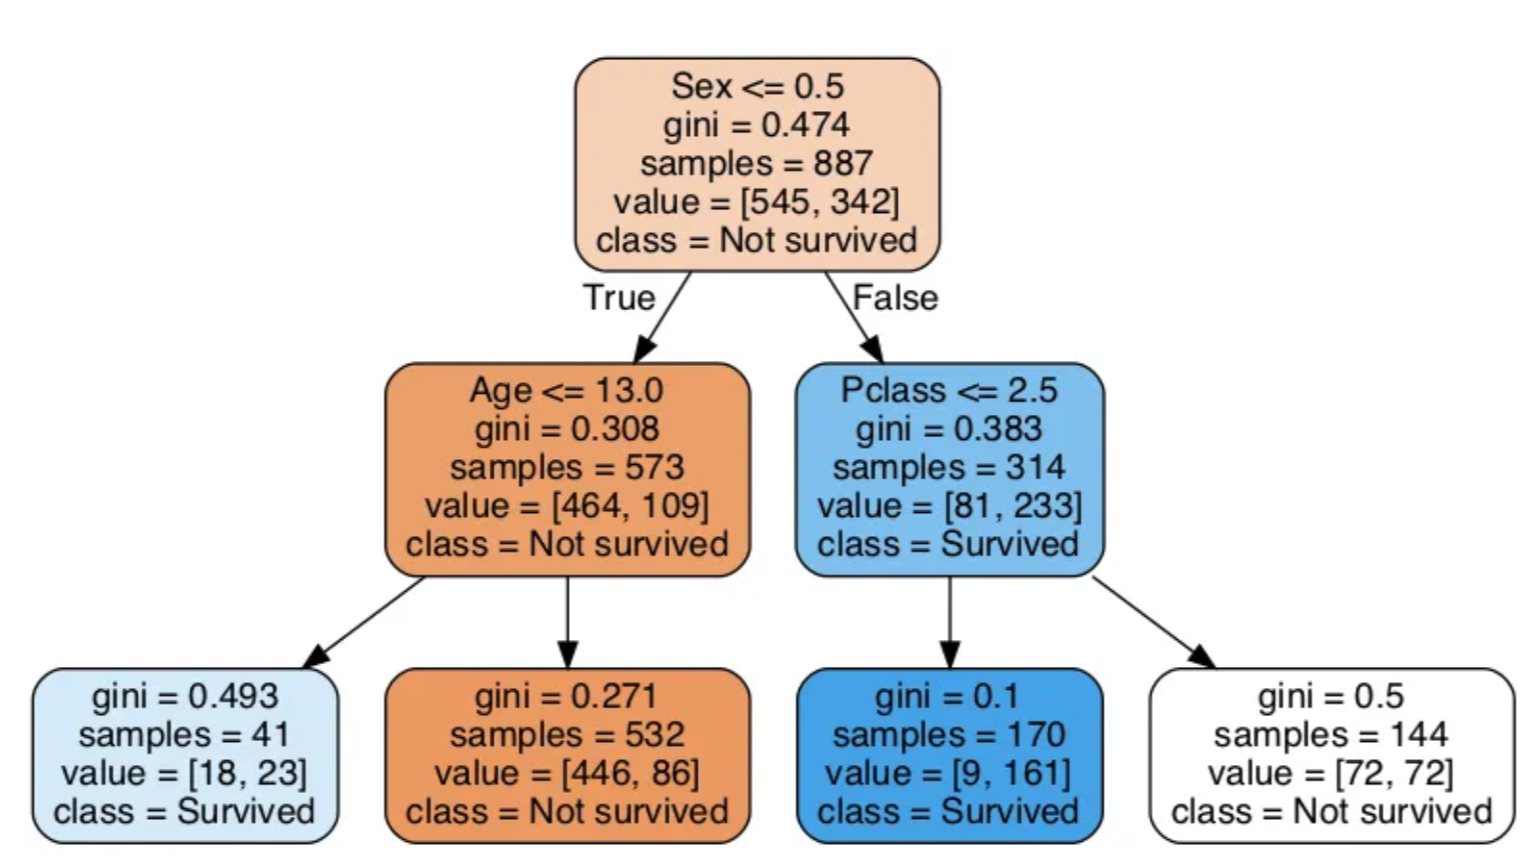


In [137]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt


df_arbol = df[['DEPARTURE_DELAY', 'DISTANCE', 'AIR_TIME', 'ARRIVAL_DELAY', 'AIRLINE', 'ORIGIN_AIRPORT']].dropna()
df_arbol['RETRASO_BINARIO'] = np.where(df_arbol['ARRIVAL_DELAY'] > 15,"Tarde","Pronto")
y = df_arbol['RETRASO_BINARIO'] 
df_arbol = df_arbol.drop(columns=['ARRIVAL_DELAY', "RETRASO_BINARIO"])
df_arbol = pd.get_dummies(df_arbol, drop_first=True)
X = df_arbol


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_arbol = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo_arbol.fit(X_train, y_train)
pred_arbol = modelo_arbol.predict(X_test)

print(confusion_matrix(y_test, pred_arbol))

[[1594   23]
 [ 118  228]]


In [138]:
(y_test == pred_arbol).mean()

np.float64(0.9281711665817626)

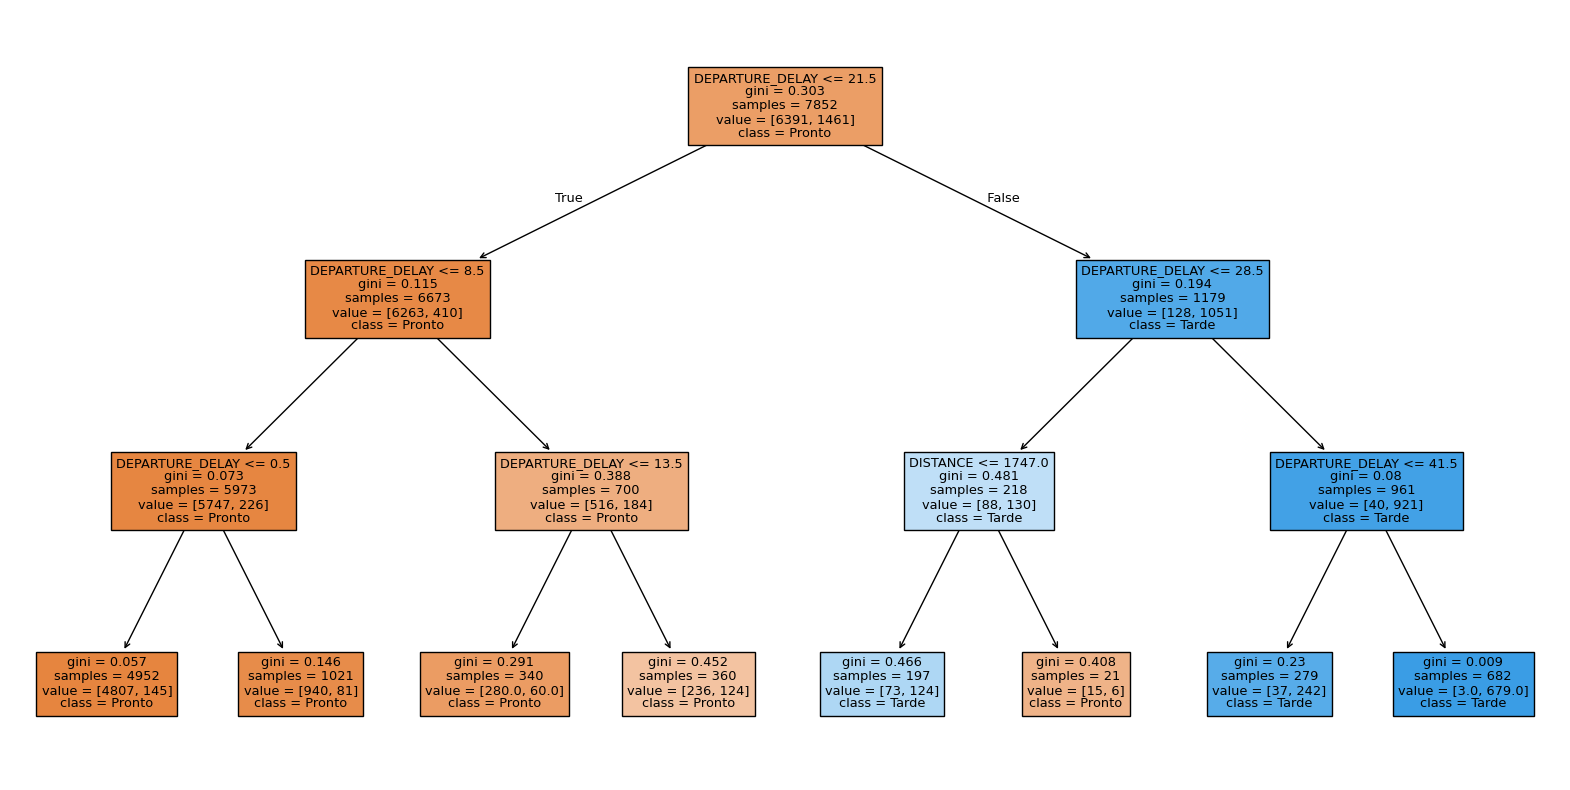

In [136]:
plt.figure(figsize=(20, 10))
plot_tree(modelo_arbol, feature_names=X_train.columns, class_names=modelo_arbol.classes_.astype("str"), filled=True)
plt.show()

# Random Forest

Subsets de datos, aleatorios tanto por filas como por columnas

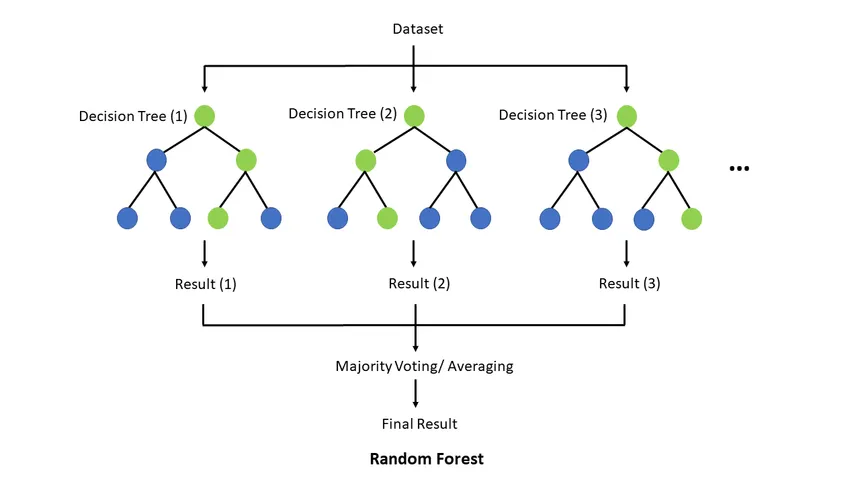

In [176]:
X.sample(5,axis = 1).sample(5)

,DEPARTURE_DELAY,AIRLINE_NK,AIRLINE_HA,AIRLINE_VX,AIRLINE_EV
8994,9.0,False,False,False,False
5877,-5.0,False,False,False,False
2755,-4.0,False,False,False,False
6611,7.0,False,False,False,True
7107,24.0,False,False,False,False


In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

df_arbol = df[['DEPARTURE_DELAY', 'DISTANCE', 'AIR_TIME', 'ARRIVAL_DELAY', 'AIRLINE']].dropna()
df_arbol['RETRASO_BINARIO'] = np.where(df_arbol['ARRIVAL_DELAY'] > 15,"Tarde","Pronto")
y = df_arbol['RETRASO_BINARIO'] 
df_arbol = df_arbol.drop(columns=['ARRIVAL_DELAY', "RETRASO_BINARIO"])
df_arbol = pd.get_dummies(df_arbol, drop_first=True)
X = df_arbol

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_rf = RandomForestClassifier(n_estimators=1000, max_depth=3, random_state=42)
modelo_rf.fit(X_train, y_train)
pred_rf = modelo_rf.predict(X_test)

(y_test== pred_rf).mean()

np.float64(0.9302088639836984)

<Axes: title={'center': 'Importancia de variables'}>

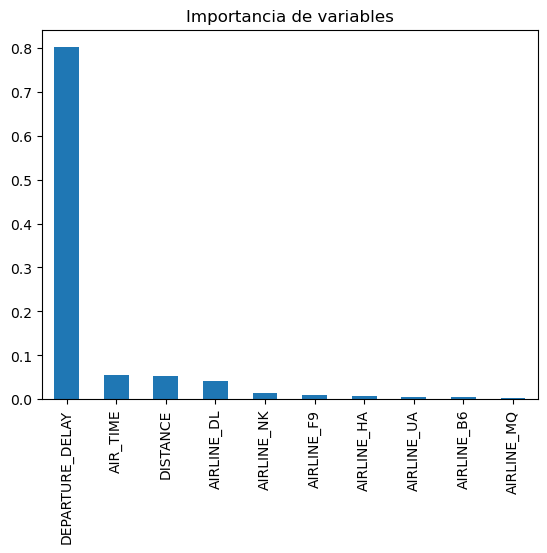

In [155]:
importances = pd.Series(modelo_rf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).head(10).plot(kind='bar', title='Importancia de variables')

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [1000],
    'max_depth': [3,5, 10, None],
    'max_features': ['sqrt', 'log2']
}

modelo_rf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(estimator=modelo_rf,
                    param_grid=param_grid,
                    cv=3,
                    scoring='accuracy',
                    n_jobs=-1)

grid.fit(X_train, y_train)

print("Mejores parámetros: " + str(grid.best_params_))
print("Mejor score: " + str(grid.best_score_))

Mejores parámetros: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 500}
Mejor score: 0.9308453016111088


In [177]:
mejor_modelo = grid.best_estimator_
pred = mejor_modelo.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy en test: " + str(accuracy_score(y_test, pred)))

Accuracy en test: 0.9296994396332144


# KMeans, agrupación jerárquica y DBSCAN

### KMeans

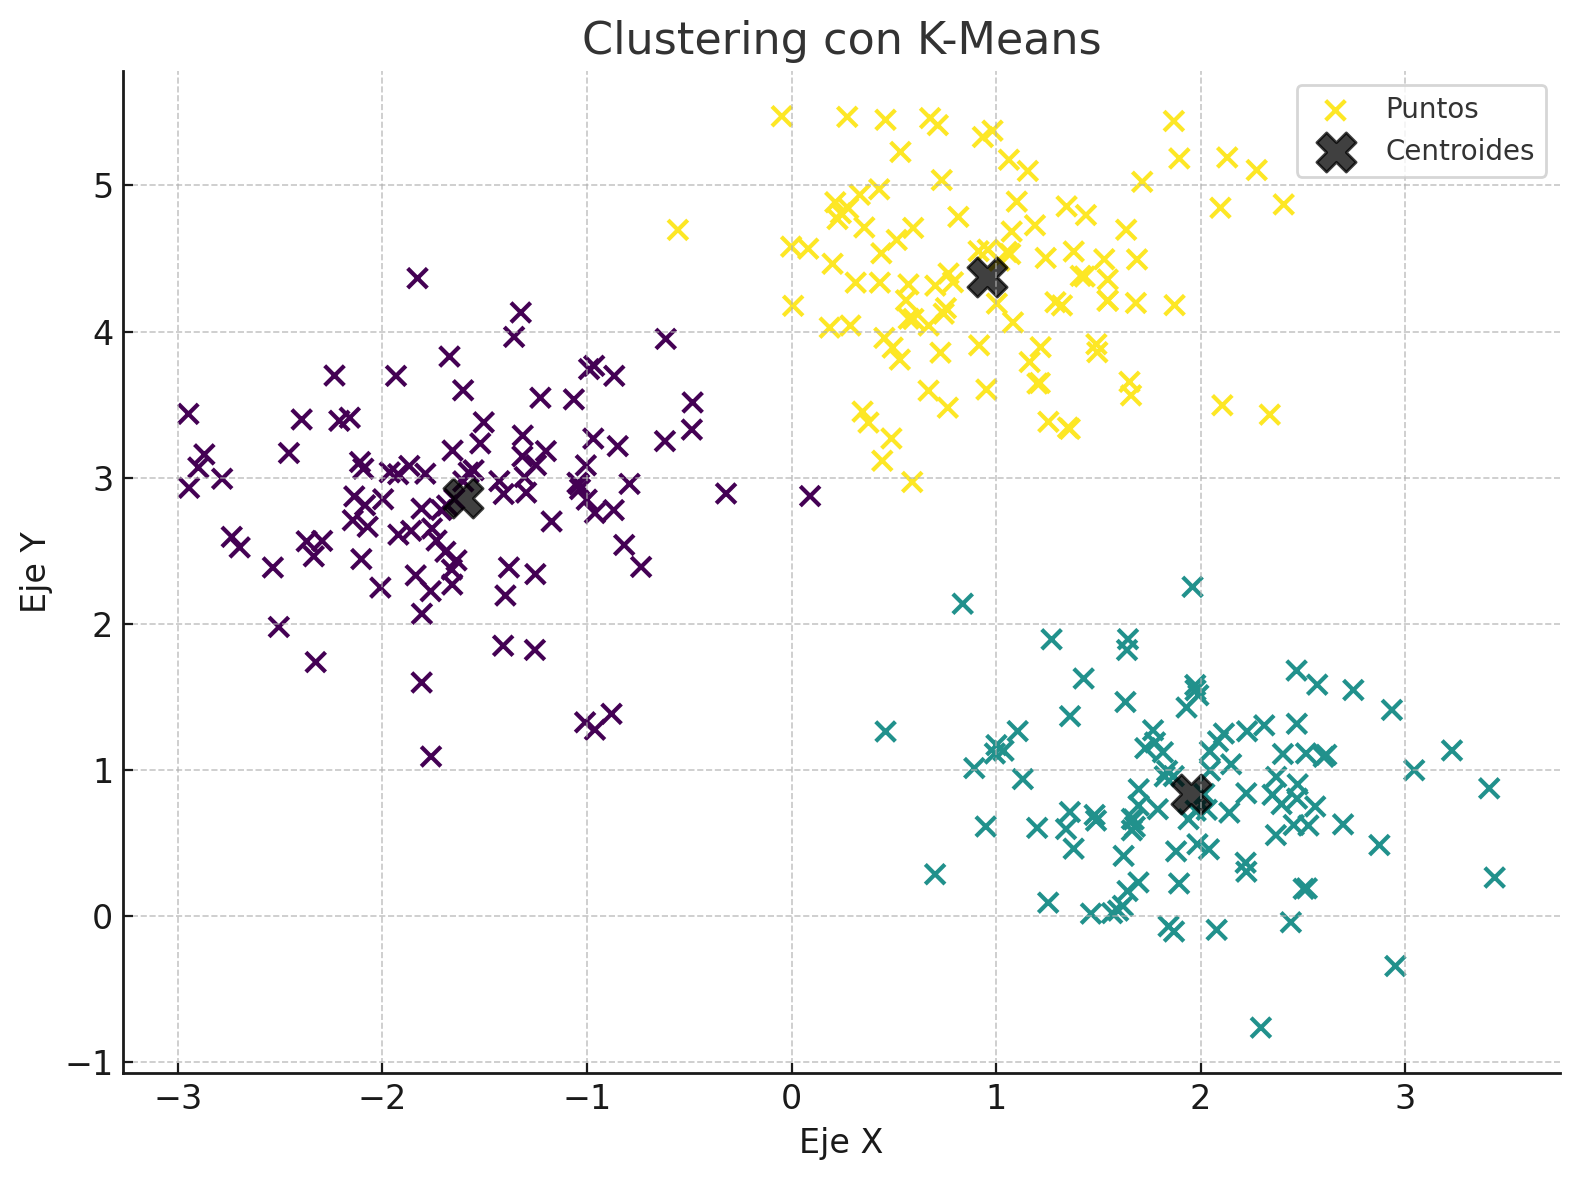

### Clustering Jerárquico

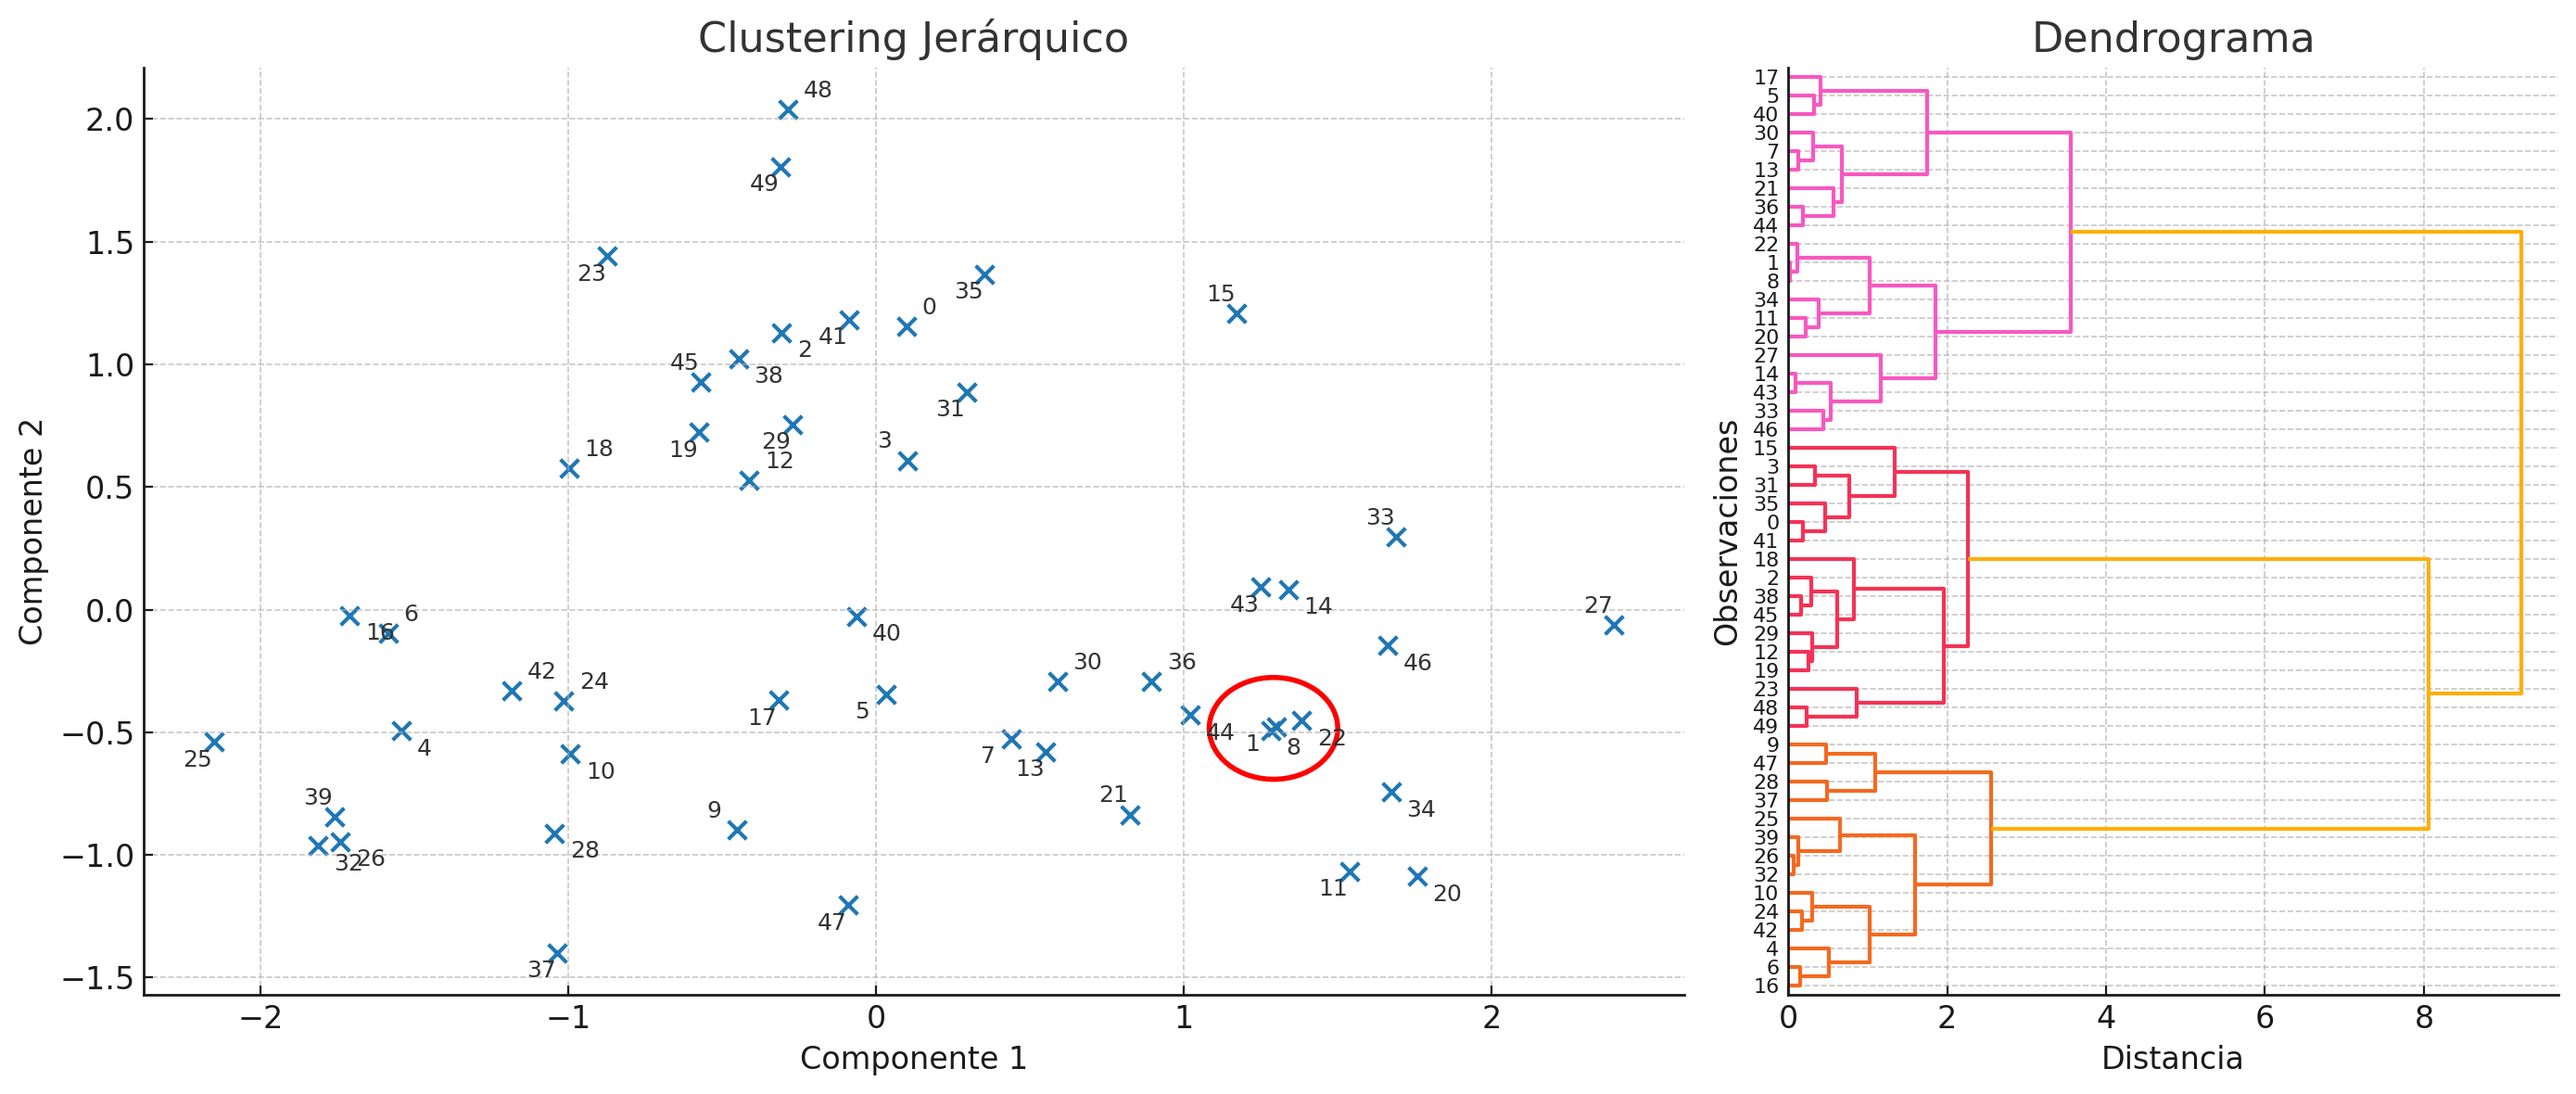

### DBSCAN

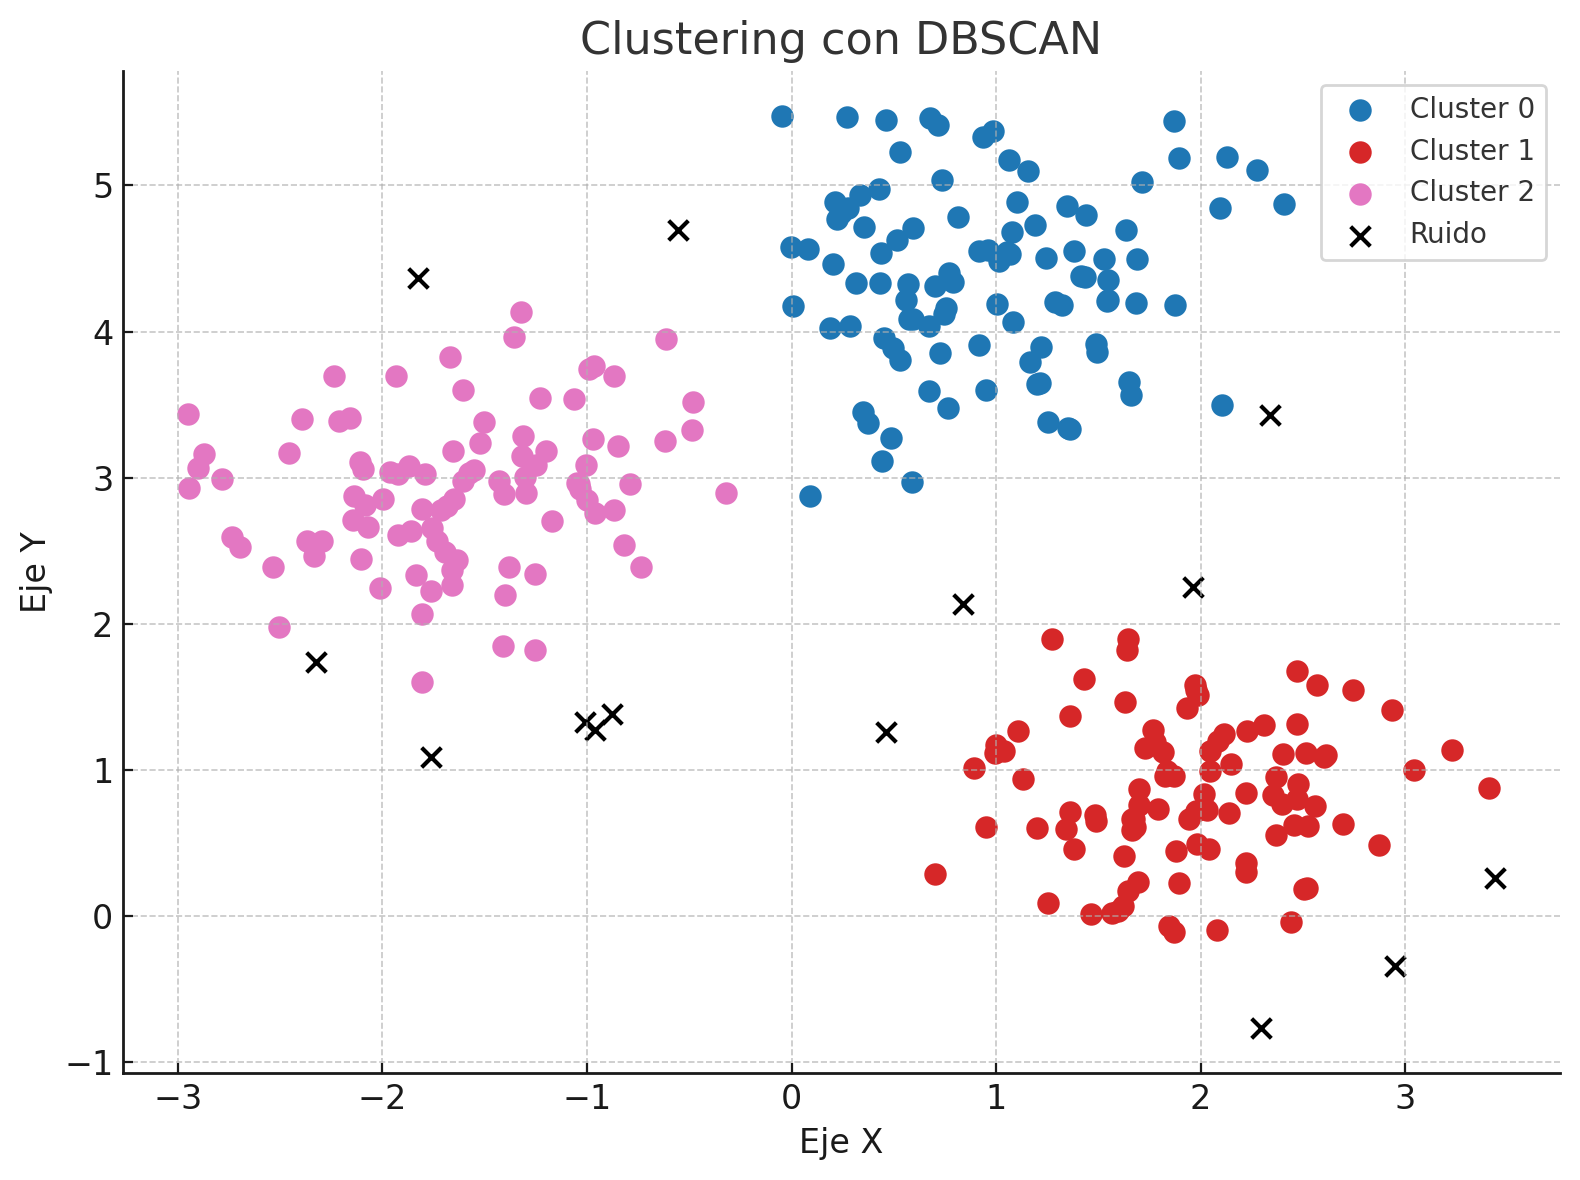

In [204]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

df_cluster = df[['ARRIVAL_DELAY', 'DEPARTURE_DELAY', 'AIR_TIME', 'DISTANCE']].dropna()
columnas = df_cluster.columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

kmeans = KMeans(n_clusters=3, random_state=0)
df_cluster['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

agg = AgglomerativeClustering(n_clusters=3)
df_cluster['cluster_jerarquico'] = agg.fit_predict(X_scaled)

dbscan = DBSCAN(eps=1, min_samples=5)
df_cluster['cluster_dbscan'] = dbscan.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [205]:
pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns = columnas)

,ARRIVAL_DELAY,DEPARTURE_DELAY,AIR_TIME,DISTANCE
0,-2.552676,5.013521,237.287324,1872.495211
1,-1.911940,2.559170,84.857067,581.701441
2,132.071279,130.417191,104.844864,737.469602


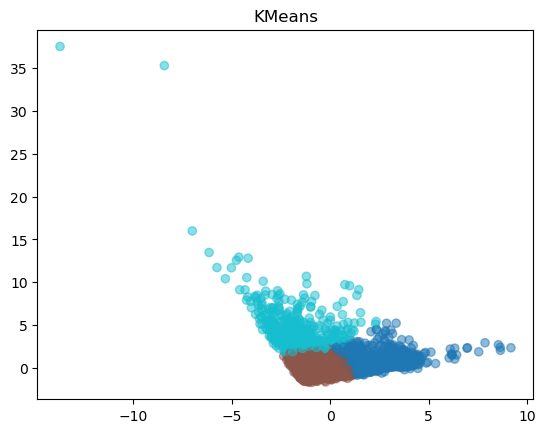

In [200]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=df_cluster['cluster_kmeans'], cmap='tab10', alpha = 0.5)
plt.title('KMeans')
plt.show()

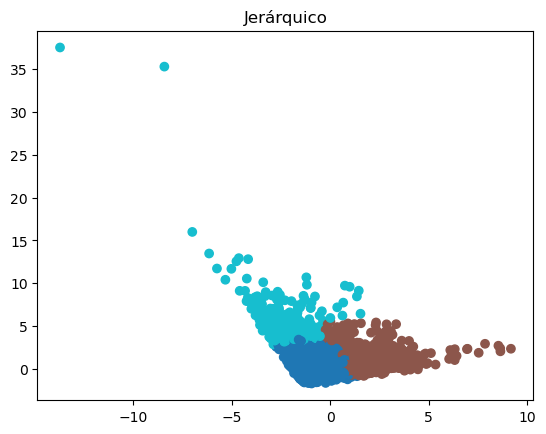

In [201]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=df_cluster['cluster_jerarquico'], cmap='tab10')
plt.title('Jerárquico')
plt.show()

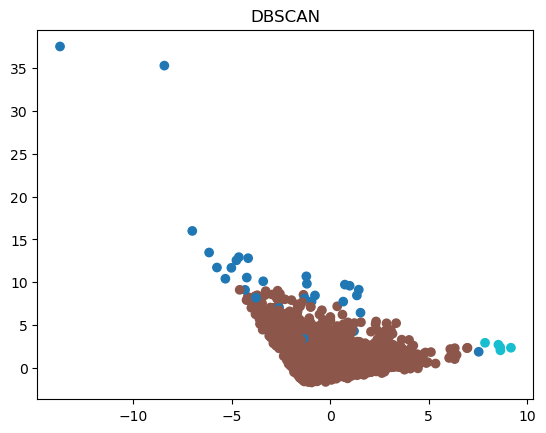

In [206]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=df_cluster['cluster_dbscan'], cmap='tab10')
plt.title('DBSCAN')
plt.show()

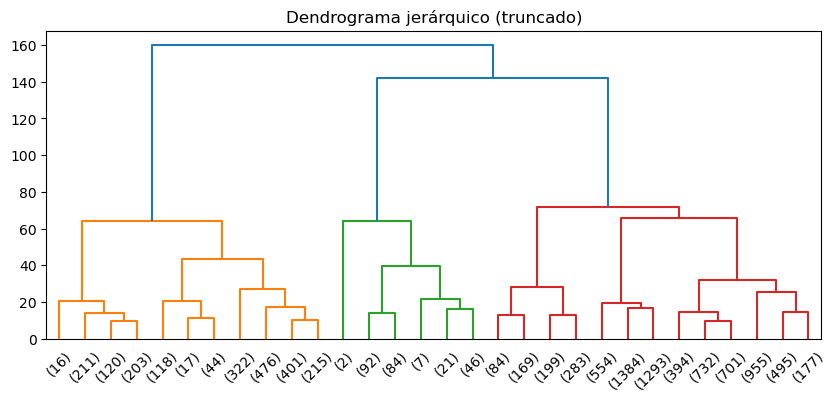

In [203]:
Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 4))
dendrogram(Z, truncate_mode='lastp', p=30)
plt.title("Dendrograma jerárquico (truncado)")
plt.show()